In [ ]:
import torch
import shutil
import requests
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomRotation(10),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, scale=(0.8,1.2), shear=10),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [ ]:
transform_val = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [ ]:
path = "C:\\Users\\goura\\Downloads\\Data Science Course\\Python Notes\\Deep Learning"

In [ ]:
train_dataset = datasets.GTSRB(root=path, split='train', transform=transform_train, download=True)
train_dataset

100%|██████████| 187490228/187490228 [00:19<00:00, 9534816.33it/s]


Extracting C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb/GTSRB-Training_fixed.zip to C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb


Dataset GTSRB
    Number of datapoints: 26640
    Root location: C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               RandomAffine(degrees=[0.0, 0.0], scale=(0.8, 1.2), shear=[-10.0, 10.0])
               ColorJitter(brightness=(0.0, 2.0), contrast=(0.0, 2.0), saturation=(0.0, 2.0), hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
val_dataset = datasets.GTSRB(root=path, split='test', transform=transform_val, download=True)
val_dataset

100%|██████████| 88978620/88978620 [00:05<00:00, 16731422.56it/s]


Extracting C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb/GTSRB_Final_Test_Images.zip to C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 212684.50it/s]


Extracting C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb/GTSRB_Final_Test_GT.zip to C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning/gtsrb


Dataset GTSRB
    Number of datapoints: 12630
    Root location: C:\Users\goura\Downloads\Data Science Course\Python Notes\Deep Learning
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=100, shuffle=False)

In [ ]:
def image_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [ ]:
GTSRB_class = 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit(90km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'
len(GTSRB_class)

43

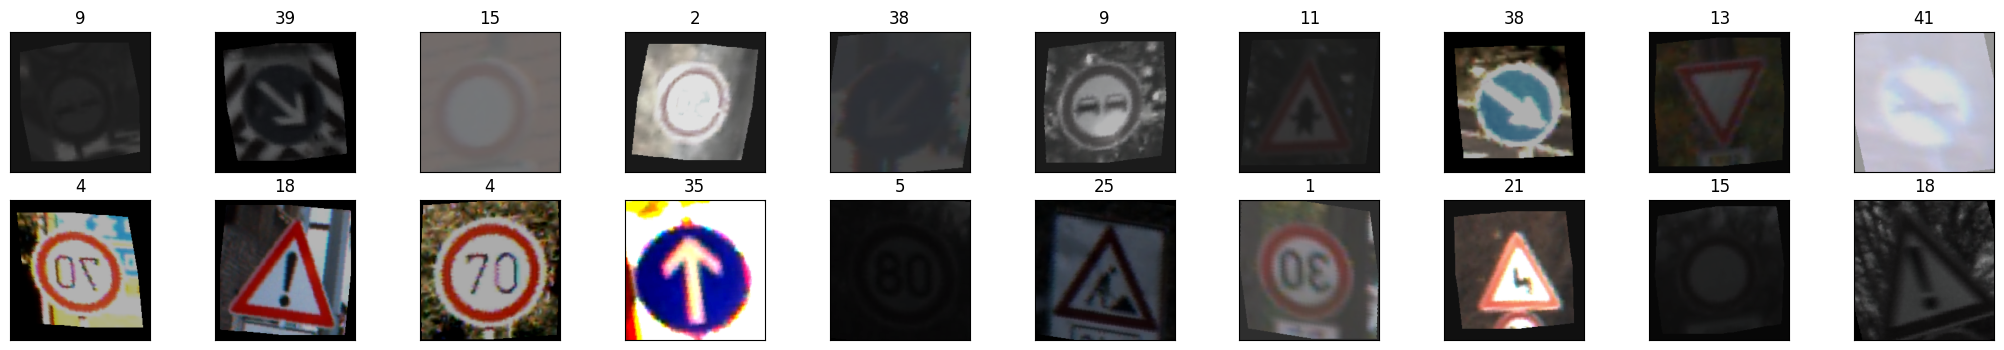

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
plt.figure(figsize=(26,4))
for i in range(20):
  ax = plt.subplot(2,10, i+1, xticks=[], yticks=[])
  plt.imshow(image_convert(images[i]))
  ax.set_title(labels[i].item())

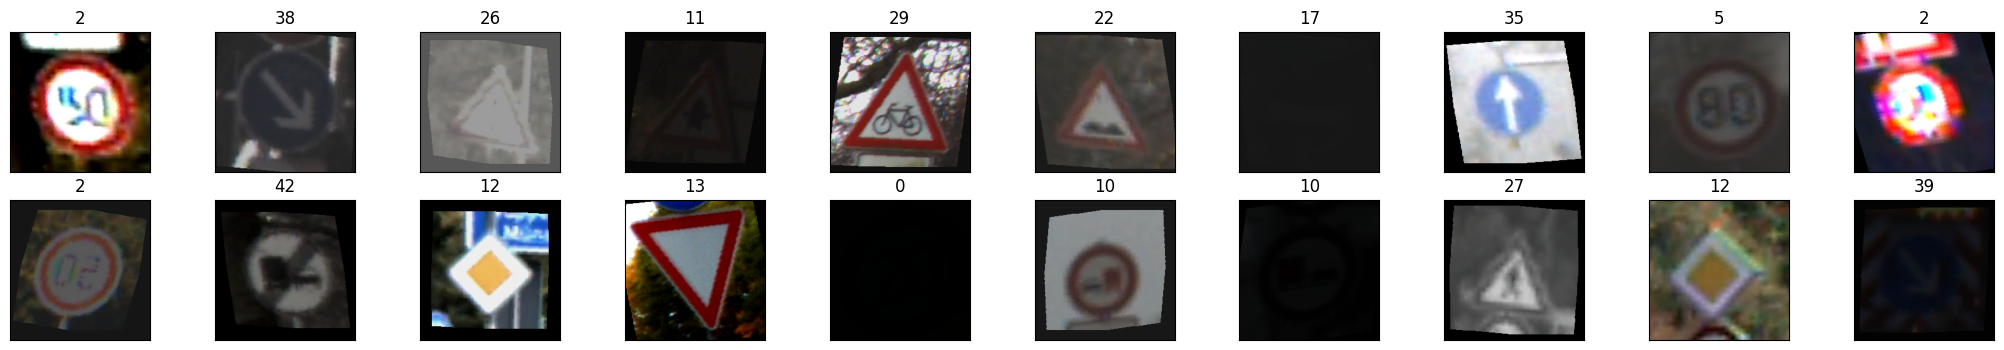

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
plt.figure(figsize=(26,4))
for i in range(20):
  ax = plt.subplot(2,10, i+1, xticks=[], yticks=[])
  plt.imshow(image_convert(images[i]))
  ax.set_title(labels[i].item())

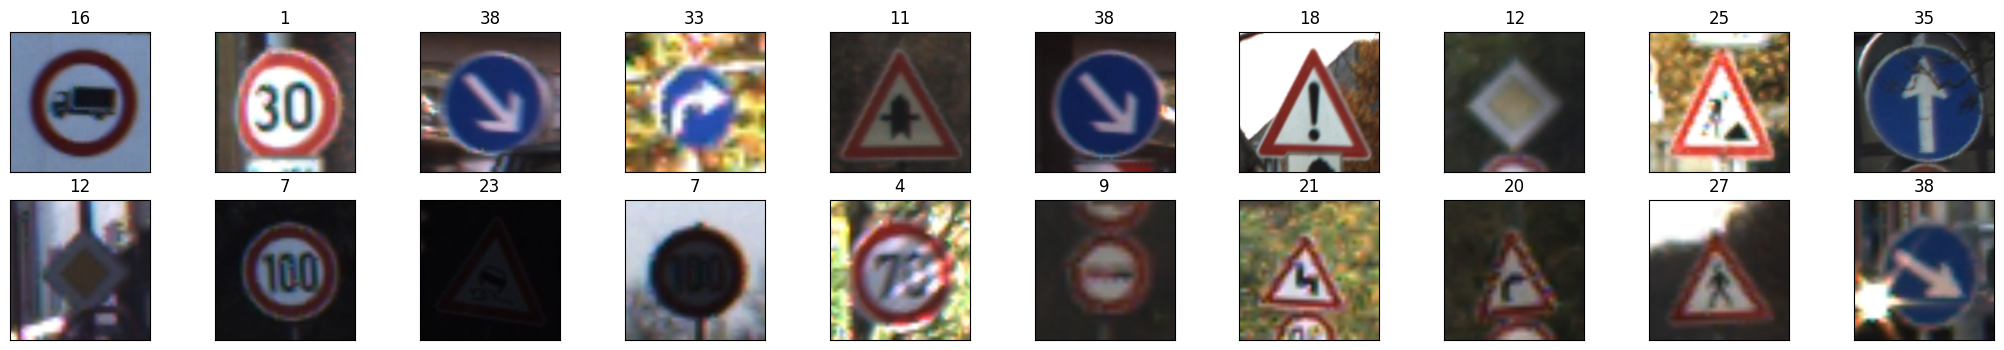

In [ ]:
val_dataiter = iter(val_loader)
val_images, val_labels = next(val_dataiter)
val_images = val_images.to(device)
val_labels = val_labels.to(device)
plt.figure(figsize=(26,4))
for j in range(20):
  axj = plt.subplot(2,10, j+1, xticks=[], yticks=[])
  plt.imshow(image_convert(val_images[j]))
  axj.set_title(val_labels[j].item())

In [ ]:
model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
print(model)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 236MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for params in model.features.parameters():
  params.requires_grad = False

In [ ]:
model.classifier[4] = nn.Linear(model.classifier[4].in_features, 256)
model.classifier[6] = nn.Linear(256, len(GTSRB_class))
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs=40
running_loss_history = []
running_acc_history = []
val_running_loss_history = []
val_running_acc_history = []
for epoch in range(epochs):
  running_loss = 0.0
  running_acc = 0.0
  val_running_acc = 0.0
  val_running_loss = 0.0
  for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs,1)
    running_acc += torch.sum(preds == labels.data)
    loss = criteria(outputs, labels)
    running_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  else:
    with torch.no_grad():
      for val_inputs, val_labels in val_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_, val_preds = torch.max(val_outputs,1)
        val_running_acc += torch.sum(val_preds == val_labels.data)
        val_loss = criteria(val_outputs, val_labels)
        val_running_loss += val_loss

    epoch_loss = running_loss / len(train_loader.dataset)
    running_loss_history.append(epoch_loss.item())
    epoch_acc = running_acc / len(train_loader.dataset)
    running_acc_history.append(epoch_acc.item())

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_running_loss_history.append(val_epoch_loss.item())
    val_epoch_acc = val_running_acc / len(val_loader.dataset)
    val_running_acc_history.append(val_epoch_acc.item())

    print('epoch: ', epoch+1)
    print('training   loss: {:.7f} \t training   accuracy: {:.4f}%' .format(epoch_loss, epoch_acc*100))
    print('validation loss: {:.7f} \t validation accuracy: {:.4f}%' .format(val_epoch_loss, val_epoch_acc*100))

epoch:  1
training   loss: 0.0232997 	 training   accuracy: 35.1539%
validation loss: 0.0140326 	 validation accuracy: 56.0649%
epoch:  2
training   loss: 0.0163006 	 training   accuracy: 51.9182%
validation loss: 0.0113094 	 validation accuracy: 63.3808%
epoch:  3
training   loss: 0.0142632 	 training   accuracy: 57.7928%
validation loss: 0.0097713 	 validation accuracy: 69.2874%
epoch:  4
training   loss: 0.0129378 	 training   accuracy: 61.4715%
validation loss: 0.0091116 	 validation accuracy: 70.7918%
epoch:  5
training   loss: 0.0120940 	 training   accuracy: 63.7838%
validation loss: 0.0082853 	 validation accuracy: 72.8345%
epoch:  6
training   loss: 0.0115687 	 training   accuracy: 65.0526%
validation loss: 0.0086375 	 validation accuracy: 71.9636%
epoch:  7
training   loss: 0.0110454 	 training   accuracy: 67.0608%
validation loss: 0.0075272 	 validation accuracy: 75.6453%
epoch:  8
training   loss: 0.0107499 	 training   accuracy: 67.7740%
validation loss: 0.0072919 	 valida

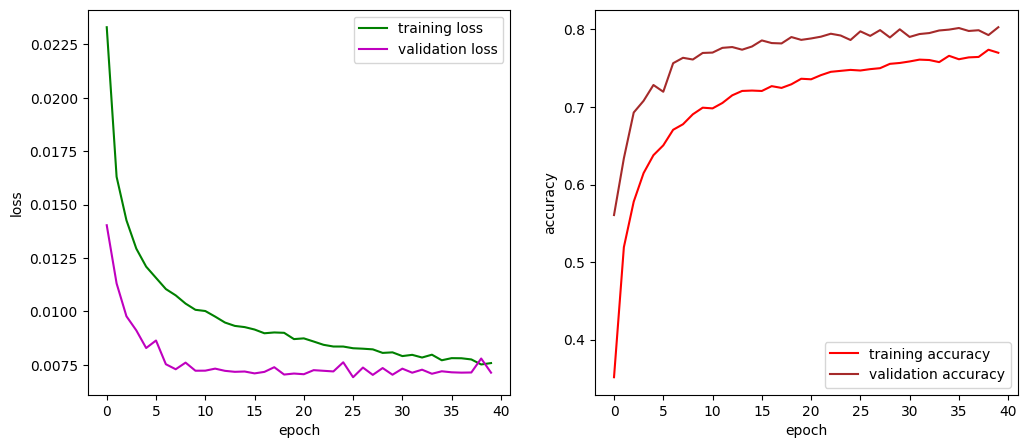

In [ ]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(range(epochs), running_loss_history, 'g')
ax1.plot(range(epochs), val_running_loss_history, 'm')
ax1.legend(['training loss', 'validation loss'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2 = plt.subplot(1,2,2)
ax2.plot(range(epochs), running_acc_history, 'r')
ax2.plot(range(epochs), val_running_acc_history, 'brown')
ax2.legend(['training accuracy', 'validation accuracy'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy');

## Un-Targeted FGSM:

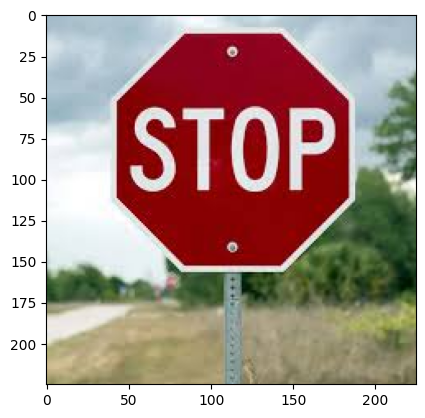

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQg6bj7ohL6Kpk0RSjnc51_J4IwnJ4n0c-AZg&usqp=CAU"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img);

torch.Size([3, 224, 224])


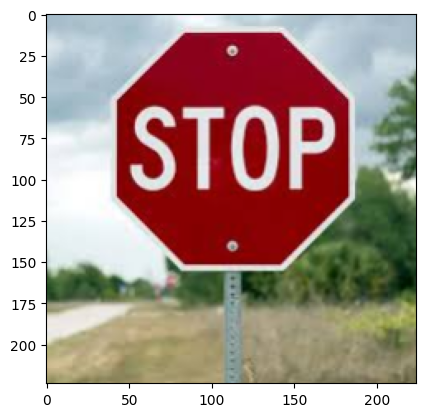

In [ ]:
img = transform_val(img)
print(img.size())
plt.imshow(image_convert(img));

In [ ]:
imge = img.to(device).unsqueeze(0)
imge.requires_grad = True
op = model(imge)
test_, test_pred_class = torch.max(op,1)
print('predicted by alexnet model as: ', GTSRB_class[test_pred_class])

test_loss1 = criteria(op, torch.tensor([test_pred_class.item()]).to(device))
optimizer.zero_grad()
test_loss1.backward()
x_grad = imge.grad.sign()
proba = F.softmax(op, dim=1)
conf = torch.max(proba)
print('Confidence: {:.2f}%' .format(conf*100))

predicted by alexnet model as:  Stop
Confidence: 100.00%


In [ ]:
eps = 0.04
x_adv = imge + (eps * x_grad.to(device))
op_adv = model(x_adv)
adv_, adv_pred = torch.max(op_adv,1)
print('Now predicted class of perturbed image = ', GTSRB_class[adv_pred.item()])
adv_proba = F.softmax(op_adv, dim=1)
adv_conf = torch.max(adv_proba)
print('Confidence: {:.4f}%' .format(adv_conf*100))

Now predicted class of perturbed image =  Speed limit (70km/h)
Confidence: 98.3883%


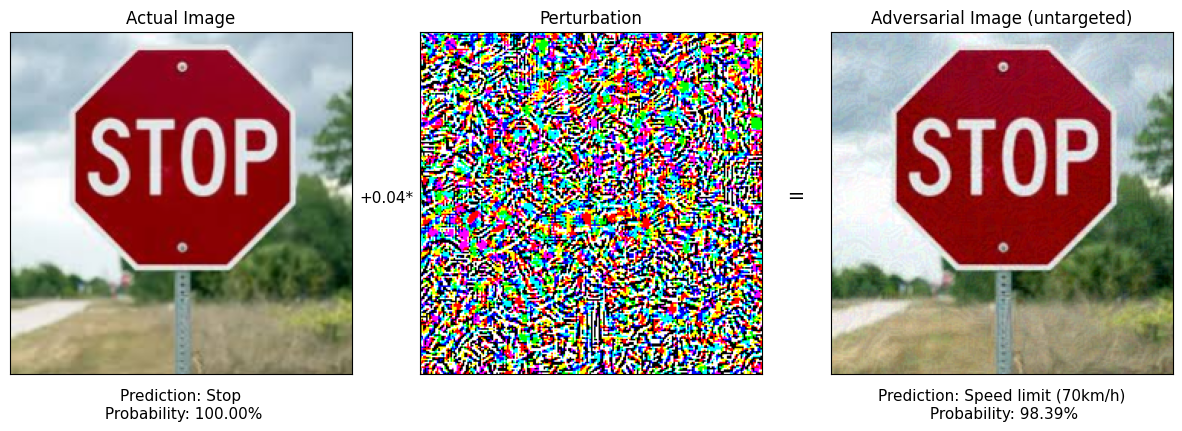

In [ ]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,3,1, xticks=[], yticks=[])
ax1.imshow(image_convert(img))
ax1.set_title('Actual Image')
ax2 = plt.subplot(1,3,2,xticks=[], yticks=[])
ax2.imshow(image_convert(x_grad.squeeze(0).cpu()))
ax2.set_title('Perturbation')
ax3 = plt.subplot(1,3,3,xticks=[], yticks=[])
ax3.imshow(image_convert(x_adv.squeeze()))
ax3.set_title('Adversarial Image (untargeted)')

ax1.text(1.1,0.5,"+{}*" .format(eps), size=11, ha='center', transform=ax1.transAxes)
ax1.text(0.5,-0.13,"Prediction: {}\n Probability: {:.2f}%" .format(GTSRB_class[test_pred_class], conf*100), size=11, ha='center', transform=ax1.transAxes)
ax3.text(0.5,-0.13,"Prediction: {}\n Probability: {:.2f}%" .format(GTSRB_class[adv_pred.item()], adv_conf*100), size=11, ha='center', transform=ax3.transAxes)
ax2.text(1.1,0.5," = " .format(eps), size=15, ha='center', transform=ax2.transAxes)
plt.show()

## Another Example:

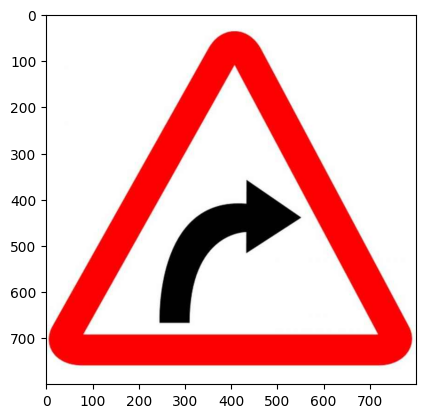

In [ ]:
url = "https://cdn.moglix.com/p/I/9/2/d/MINI92JBI42ZO-xxlarge.jpg"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img);

torch.Size([3, 224, 224])


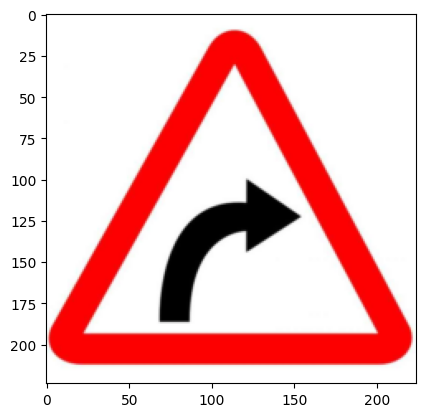

In [ ]:
img = transform_val(img)
print(img.size())
plt.imshow(image_convert(img));

In [ ]:
imge = img.to(device).unsqueeze(0)
imge.requires_grad = True
op = model(imge)
test_, test_pred_class = torch.max(op,1)
print('predicted by alexnet model as: ', GTSRB_class[test_pred_class])

test_loss1 = criteria(op, torch.tensor([test_pred_class.item()]).to(device))
optimizer.zero_grad()
test_loss1.backward()
x_grad = imge.grad.sign()
proba = F.softmax(op, dim=1)
conf = torch.max(proba)
print('Confidence: {:.2f}%' .format(conf*100))

predicted by alexnet model as:  Dangerous curve to the right
Confidence: 99.79%


In [ ]:
eps = 0.04
x_adv = imge + (eps * x_grad.to(device))
op_adv = model(x_adv)
adv_, adv_pred = torch.max(op_adv,1)
print('Now predicted class of perturbed image = ', GTSRB_class[adv_pred.item()])
adv_proba = F.softmax(op_adv, dim=1)
adv_conf = torch.max(adv_proba)
print('Confidence: {:.4f}%' .format(adv_conf*100))

Now predicted class of perturbed image =  Dangerous curve to the left
Confidence: 98.6459%


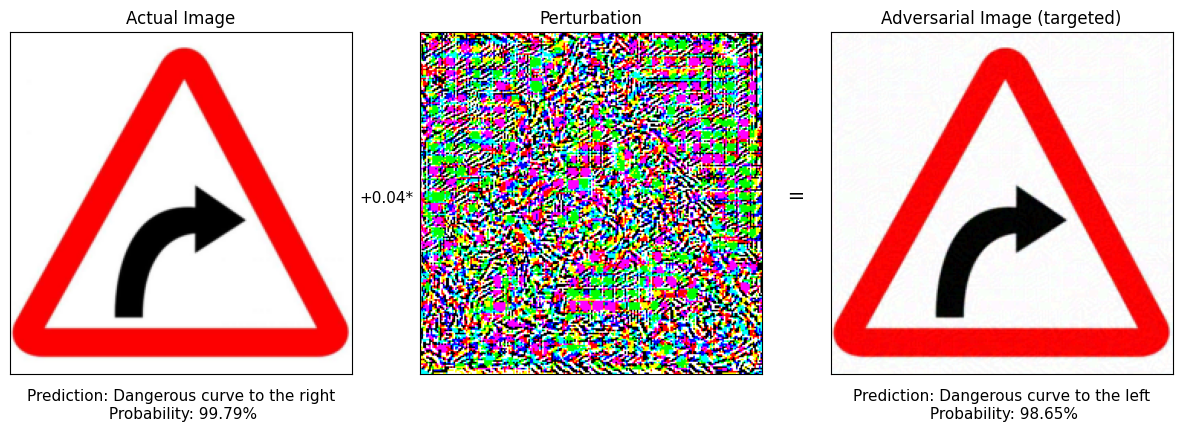

In [ ]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,3,1, xticks=[], yticks=[])
ax1.imshow(image_convert(img))
ax1.set_title('Actual Image')
ax2 = plt.subplot(1,3,2,xticks=[], yticks=[])
ax2.imshow(image_convert(x_grad.squeeze(0).cpu()))
ax2.set_title('Perturbation')
ax3 = plt.subplot(1,3,3,xticks=[], yticks=[])
ax3.imshow(image_convert(x_adv.squeeze()))
ax3.set_title('Adversarial Image (targeted)')

ax1.text(1.1,0.5,"+{}*" .format(eps), size=11, ha='center', transform=ax1.transAxes)
ax1.text(0.5,-0.13,"Prediction: {}\n Probability: {:.2f}%" .format(GTSRB_class[test_pred_class], conf*100), size=11, ha='center', transform=ax1.transAxes)
ax3.text(0.5,-0.13,"Prediction: {}\n Probability: {:.2f}%" .format(GTSRB_class[adv_pred.item()], adv_conf*100), size=11, ha='center', transform=ax3.transAxes)
ax2.text(1.1,0.5," = " .format(eps), size=15, ha='center', transform=ax2.transAxes)
plt.show()